In [2]:
import pandas as pd
import altair as alt
import numpy as np


In [3]:
#LEAD CHANGES
# RESULTS: (Country, status changes, all games)
# England   2012    380    5.29
# France    2045    380    5.38
# Germany   1691    306    5.52
# Spain     2026    380    5.33
# Italy     2006    380    5.27

lead = np.array([5.29, 5.38, 5.52, 5.33, 5.27])
#maxLead = max(lead)
#lead = lead/maxLead

In [4]:
#LAST MINUTE GOALS
# RESULTS: (Country, last minutes goals, all games)
# England   168     380     0.442
# France    156     380     0.411
# Germany   130     306     0.424
# Spain     145     380     0.381
# Italy     158     380     0.415

lastmin = np.array([0.442, 0.411, 0.424, 0.381, 0.415])
#maxLastmin = max(lastmin)
#lastmin = lastmin / maxLastmin

In [28]:
#GOALLESS DRAWS
# RESULTS: (Country, goalless games, all games)
# England   32      380     0.0842
# France    21      380     0.0552
# Germany   21      306     0.0686
# Spain     28      380     0.0736
# Italy     28      380     0.0736

goalles = np.array([0.0842, 0.0552, 0.0686,0.0736, 0.0736])*100
# maxGoalles = max(goalles)
# goalles = goalles/maxGoalles

In [29]:
properties = ['Lead changes', 'Last minute goals','Goalless draws']
properties = ['lead', 'lastmin', 'goalless']
values =  [ lead[3], lastmin[3], goalles[3]]
means = [np.mean(lead), np.mean(lastmin), np.mean(goalles)]

bulletchartLEADdf = pd.DataFrame({properties[0]:values[0], 'Average':means[0]}, index=[0])
bulletchartLASTMINdf = pd.DataFrame({properties[1]:values[1], 'Average':means[1]}, index=[0])
bulletchartDRAWSdf =  pd.DataFrame({properties[2]:values[2], 'Average':means[2]}, index=[0])

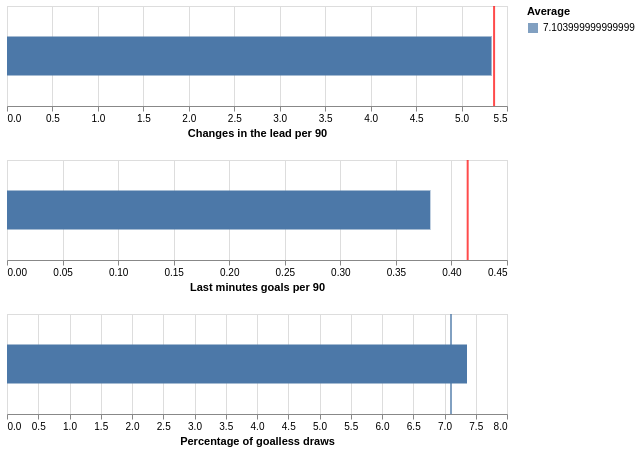

In [36]:
import altair as alt

base = alt.Chart(bulletchartLEADdf, width = 500, height = 200)

bulletchartLEAD= alt.Chart(bulletchartLEADdf, width = 500, height = 100).mark_bar().encode(
#y = properties[0]+':N',
x = alt.X(properties[0]+':Q', axis = alt.Axis(title='Changes in the lead per 90'))   
)
tickLEAD= alt.Chart(bulletchartLEADdf, width = 500, height = 100).mark_tick(color='red',thickness=2).encode(
#y = 'Properties:N',
x = 'Average:Q'
)

LEAD = (bulletchartLEAD+tickLEAD)

bulletchartLASTMIN =  alt.Chart(bulletchartLASTMINdf, width = 500, height = 100).mark_bar().encode(
#y = 'Properties:N',
x = alt.X(properties[1]+':Q' , axis = alt.Axis(title='Last minutes goals per 90'))
)

tickLASTMIN= alt.Chart(bulletchartLASTMINdf, width = 500, height = 100).mark_tick(color='red',thickness=2).encode(
#y = 'Properties:N',
x = 'Average:Q'
)

LASTMIN = (bulletchartLASTMIN+tickLASTMIN)

bulletchartDRAWS =  alt.Chart(bulletchartDRAWSdf, width = 500, height = 100).mark_bar().encode(
#y = 'Properties:N',  
x = alt.X(properties[2]+':Q', axis = alt.Axis(title='Percentage of goalless draws'))    
)

tickDRAWS= alt.Chart(bulletchartDRAWSdf, width = 500, height = 100).mark_tick(color='red',thickness=2).encode(
#y = 'Properties:N',
x = 'Average:Q',
color = 'Average:N'
)

DRAWS = (bulletchartDRAWS+tickDRAWS)


alt.vconcat(LEAD, LASTMIN, DRAWS).configure_tick(
    bandSize=100 # controls the width of the tick
).configure_scale(
    rangeStep=40  # controls the width of the bar
)
# (bulletchartLEAD+tickLEAD).configure_tick(
#     bandSize=100 # controls the width of the tick
# ).configure_scale(
#     rangeStep=40  # controls the width of the bar
# )


In [33]:
properties[0]+':Q'

'lead:Q'